In [13]:
from keras.datasets import imdb
import numpy as np

In [14]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [15]:
# 단어들의 idx
word_idx = imdb.get_word_index()

In [16]:
word_idx['the']

1

In [17]:
reverse_word_idx = dict([(v, k) for (k, v) in word_idx.items()])

In [18]:
reverse_word_idx[1]

'the'

In [19]:
decode_review = ' '.join([reverse_word_idx.get(i - 3, "?") for i in train_data[0]])

In [20]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [21]:
train_label[0]

1

In [22]:
from tensorflow.keras.preprocessing import sequence
x_train = sequence.pad_sequences(train_data, maxlen=500)
x_test = sequence.pad_sequences(test_data, maxlen=500)

In [23]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [24]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [25]:
# 모델 설계

In [26]:
from keras import models, layers, regularizers

In [27]:
model = models.Sequential([
  layers.Embedding(input_dim=10000, output_dim=32),
  layers.LSTM(32),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 5s 30ms/step - loss: 0.5058 - accuracy: 0.7532 - val_loss: 0.3862 - val_accuracy: 0.8350
Epoch 2/20
157/157 [==============================] - 4s 28ms/step - loss: 0.2998 - accuracy: 0.8826 - val_loss: 0.3308 - val_accuracy: 0.8652
Epoch 3/20
157/157 [==============================] - 4s 28ms/step - loss: 0.2328 - accuracy: 0.9136 - val_loss: 0.6033 - val_accuracy: 0.8170
Epoch 4/20
157/157 [==============================] - 4s 28ms/step - loss: 0.2008 - accuracy: 0.9276 - val_loss: 0.3528 - val_accuracy: 0.8588
Epoch 5/20
157/157 [==============================] - 4s 28ms/step - loss: 0.1808 - accuracy: 0.9330 - val_loss: 0.3026 - val_accuracy: 0.8852
Epoch 6/20
157/157 [==============================] - 4s 28ms/step - loss: 0.1588 - accuracy: 0.9441 - val_loss: 0.6302 - val_accuracy: 0.8200
Epoch 7/20
157/157 [==============================] - 4s 28ms/step - loss: 0.1457 - accuracy: 0.9502 - val_loss: 0.3427 - val_accuracy: 0.8788

In [34]:
# accuracy: 0.9291 - val_loss: 0.4126 - val_accuracy: 0.8570

import matplotlib.pyplot as plt

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [36]:
epochs = range(1, len(acc) + 1)

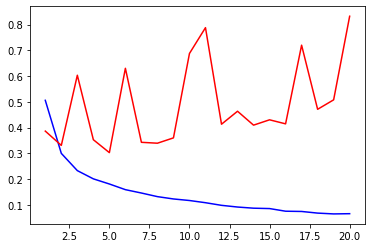

In [37]:
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')

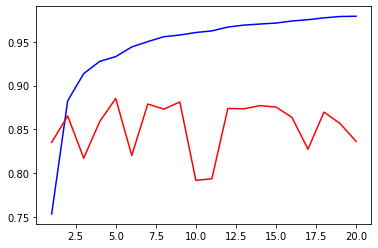

In [38]:
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')

In [40]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.8762 - accuracy: 0.8236


[0.8761695027351379, 0.8235599994659424]